In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cinci_1320 = pd.read_csv('./data/cinci1320.csv', index_col='Date_of_Payment', parse_dates=True).sort_index()

C:\Users\sarah\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (17,18,19,47,48,49,50,51,52,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
cinci_1320.head()

,Change_Type,Covered_Recipient_Type,Physician_Profile_ID,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,Physician_Name_Suffix,Recipient_Primary_Business_Street_Address_Line1,Recipient_Primary_Business_Street_Address_Line2,Recipient_City,...,xarelto,victoza,humira,levemir,invokana,farxiga,entresto,chantix,myrbetriq,toujeo
Date_of_Payment,,,,,,,,,,,,,,,,,,,,,
2013-08-01,UNCHANGED,Covered Recipient Physician,148974,RODNEY,NaN,VIVIAN,NaN,8000 5 MILE RD,240,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0
2013-08-01,UNCHANGED,Covered Recipient Physician,58931,PAUL,JOSEPH,FAVORITO,NaN,7575 5 MILE RD,NaN,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0
2013-08-01,UNCHANGED,Covered Recipient Physician,812462,ALFRED,JAMES,SUGAWARA,NaN,8477 FOXCROFT DR,NaN,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0
2013-08-01,UNCHANGED,Covered Recipient Physician,108863,MARK,A,MANEGOLD,NaN,2450 KIPLING AVE,SUITE 104,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0
2013-08-01,UNCHANGED,Covered Recipient Physician,195441,MANOJKUMAR,S,SINGH,NaN,10600 MONTGOMERY RD,SUITE 200,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0


In [4]:
cinci_1320['Change_Type'].value_counts()

UNCHANGED    364686
CHANGED         726
ADD               1
Name: Change_Type, dtype: int64

In [5]:
cinci_1320['humira'].value_counts()

0    359188
1      6225
Name: humira, dtype: int64

In [6]:
humira = cinci_1320[(cinci_1320['humira']==1) & (cinci_1320['Number_of_Payments_Included_in_Total_Amount']==1)].copy()

In [7]:
humira['humira'].value_counts()

1    6225
Name: humira, dtype: int64

In [8]:
humira['Change_Type'].value_counts()

UNCHANGED    6225
Name: Change_Type, dtype: int64

In [9]:
humira['humi_dollars'] = [k if ((i ==1) & (j ==1)) else 0 for i, j, k in zip(humira['humira'], humira['Number_of_Payments_Included_in_Total_Amount'], humira['Total_Amount_of_Payment_USDollars'])]

#Ben Peck helped me with this during office hours.  I was oh-so-close but not quite there!

In [10]:
humira['humi_dollars'].sum()

1022517.3

In [11]:
drop_cols = ['Change_Type','Covered_Recipient_Type',
'Physician_First_Name',
'Physician_Middle_Name',
'Physician_Last_Name',
'Physician_Name_Suffix',
'Recipient_Primary_Business_Street_Address_Line1',
'Recipient_Primary_Business_Street_Address_Line2',
'Recipient_City',
'Recipient_State',
'Recipient_Zip_Code',
'Recipient_Country',
'Physician_Primary_Type',
'Physician_Specialty',
'Physician_License_State_code1',
'Physician_License_State_code2',
'Physician_License_State_code3',
'Physician_License_State_code4',
'Physician_License_State_code5',
'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name',
'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State',
'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country',
'Form_of_Payment_or_Transfer_of_Value',
'City_of_Travel',
'State_of_Travel',
'Country_of_Travel',
'Physician_Ownership_Indicator',
'Third_Party_Payment_Recipient_Indicator',
'Name_of_Third_Party_Entity_Receiving_Payment_or_Transfer_of_Value',
'Charity_Indicator',
'Third_Party_Equals_Covered_Recipient_Indicator',
'Contextual_Information',
'Delay_in_Publication_Indicator',
'Dispute_Status_for_Publication',
'Related_Product_Indicator',
'Covered_or_Noncovered_Indicator_1',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1',
'Product_Category_or_Therapeutic_Area_1',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1',
'Associated_Drug_or_Biological_NDC_1',
'Covered_or_Noncovered_Indicator_2',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_2',
'Product_Category_or_Therapeutic_Area_2',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_2',
'Associated_Drug_or_Biological_NDC_2',
'Covered_or_Noncovered_Indicator_3',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_3',
'Product_Category_or_Therapeutic_Area_3',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_3',
'Associated_Drug_or_Biological_NDC_3',
'Covered_or_Noncovered_Indicator_4',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_4',
'Product_Category_or_Therapeutic_Area_4',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_4',
'Associated_Drug_or_Biological_NDC_4',
'Covered_or_Noncovered_Indicator_5',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5',
'Product_Category_or_Therapeutic_Area_5',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_5',
'Associated_Drug_or_Biological_NDC_5', 
'Physician_Profile_ID', 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID',
'Total_Amount_of_Payment_USDollars','Number_of_Payments_Included_in_Total_Amount', 
'Nature_of_Payment_or_Transfer_of_Value', 'Record_ID', 
'Payment_Publication_Date', 'Program_Year',
'xarelto', 'farxiga', 'victoza', 'invokana', 'levemir',
'entresto', 'chantix', 'myrbetriq', 'toujeo']

In [12]:
humira.drop(columns = drop_cols, inplace = True)

In [13]:
humira['z_score'] = [ ((i - humira['humi_dollars'].mean())/humira['humi_dollars'].std()) for i in humira['humi_dollars']]

In [14]:
humira.shape

(6225, 13)

In [15]:
humirab = humira[(np.abs(humira['z_score']) < 3)].copy()

In [16]:
humirab.shape

(6021, 13)

In [17]:
humira_wkly = humirab.resample('w').sum()

In [18]:
humira_wkly.head()

,humira,humi_dollars,z_score
Date_of_Payment,,,
2013-08-04,8,271.42,-1.566540
2013-08-11,10,468.39,-1.764186
2013-08-18,14,923.66,-2.067334
2013-08-25,7,743.39,-0.610638
2013-09-01,10,125.83,-2.278865


In [19]:
humira_wkly.sort_index()

,humira,humi_dollars,z_score
Date_of_Payment,,,
2013-08-04,8,271.42,-1.566540
2013-08-11,10,468.39,-1.764186
2013-08-18,14,923.66,-2.067334
2013-08-25,7,743.39,-0.610638
2013-09-01,10,125.83,-2.278865
...,...,...,...
2020-11-29,7,1488.62,0.509031
2020-12-06,10,137.81,-2.260865
2020-12-13,5,77.40,-1.117669


Look at some plots

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

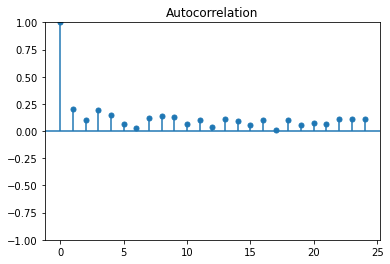

In [21]:
plot_acf(humira_wkly['humi_dollars'], alpha=None, lags=24);

C:\Users\sarah\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


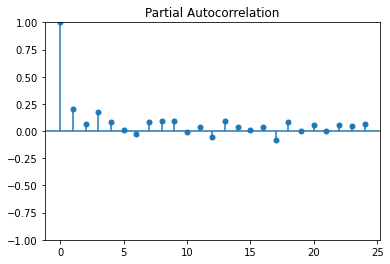

In [22]:
plot_pacf(humira_wkly['humi_dollars'], alpha=None, lags=24);

Adding 1 to the weekly sales for each observation so that Holt_winters will work.

In [23]:
humira_wkly['humi_dollars'] = [i+1 for i in humira_wkly['humi_dollars']]

Set up Train and Test Sets using 2018, 2019 & 2020 Data

In [24]:
train = humira_wkly.loc[:'2019-12-31']
train

,humira,humi_dollars,z_score
Date_of_Payment,,,
2013-08-04,8,272.42,-1.566540
2013-08-11,10,469.39,-1.764186
2013-08-18,14,924.66,-2.067334
2013-08-25,7,744.39,-0.610638
2013-09-01,10,126.83,-2.278865
...,...,...,...
2019-12-01,13,70.51,-3.103858
2019-12-08,16,197.62,-3.653257
2019-12-15,16,193.84,-3.658936


In [25]:
train['humi_dollars'].max()

7771.75

In [26]:
train.describe()

,humira,humi_dollars,z_score
count,335.000000,335.000000,335.000000
mean,17.083582,984.888209,-2.737847
std,9.636144,1181.930601,2.307350
min,0.000000,1.000000,-9.543339
25%,10.500000,155.575000,-4.093556
50%,16.000000,452.740000,-2.577551
75%,23.000000,1588.675000,-1.051371
max,47.000000,7771.750000,4.490742


In [27]:
train.index.freq = 'W' 

In [28]:
train.shape

(335, 3)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 335 entries, 2013-08-04 to 2019-12-29
Freq: W-SUN
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   humira        335 non-null    int64  
 1   humi_dollars  335 non-null    float64
 2   z_score       335 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 10.5 KB


In [30]:
train.index

DatetimeIndex(['2013-08-04', '2013-08-11', '2013-08-18', '2013-08-25',
               '2013-09-01', '2013-09-08', '2013-09-15', '2013-09-22',
               '2013-09-29', '2013-10-06',
               ...
               '2019-10-27', '2019-11-03', '2019-11-10', '2019-11-17',
               '2019-11-24', '2019-12-01', '2019-12-08', '2019-12-15',
               '2019-12-22', '2019-12-29'],
              dtype='datetime64[ns]', name='Date_of_Payment', length=335, freq='W-SUN')

In [31]:
test = humira_wkly.loc['2020-01-01':]
test

,humira,humi_dollars,z_score
Date_of_Payment,,,
2020-01-05,0,1.00,0.000000
2020-01-12,5,89.04,-1.101683
2020-01-19,17,196.97,-3.901025
2020-01-26,5,215.52,-0.911654
2020-02-02,6,83.07,-1.357445
2020-02-09,11,129.37,-2.521840
2020-02-16,11,152.83,-2.486593
2020-02-23,12,139.83,-2.752916
2020-03-01,19,242.17,-4.326698


In [32]:
test.describe()

,humira,humi_dollars,z_score
count,52.000000,52.000000,52.000000
mean,5.730769,249.073269,-1.041590
std,4.802432,503.352420,1.263672
min,0.000000,1.000000,-4.326698
25%,2.000000,38.860000,-1.879541
50%,5.000000,82.695000,-0.902324
75%,10.000000,156.795000,0.000000
max,19.000000,2569.390000,1.250113


In [33]:
test.shape

(52, 3)

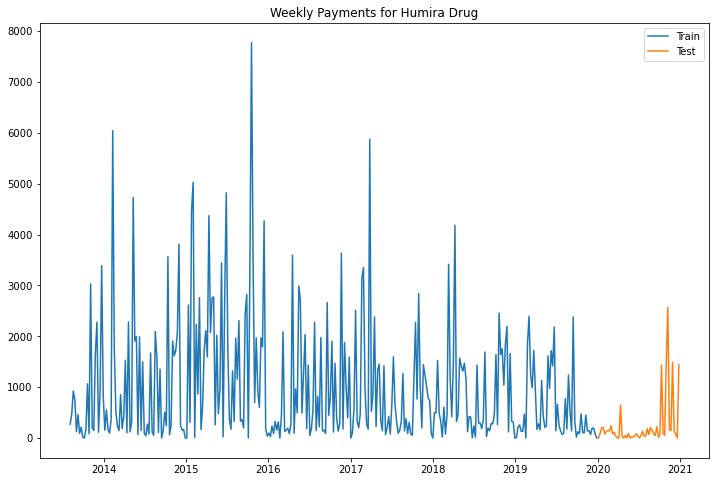

In [34]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['humi_dollars'], label='Train')
plt.plot(test.index, test['humi_dollars'], label='Test')

plt.legend(loc='best')
plt.title("Weekly Payments for Humira Drug");

Baseline (Naive Model)

In [35]:
df_preds = test.copy(deep=True)
df_preds

,humira,humi_dollars,z_score
Date_of_Payment,,,
2020-01-05,0,1.00,0.000000
2020-01-12,5,89.04,-1.101683
2020-01-19,17,196.97,-3.901025
2020-01-26,5,215.52,-0.911654
2020-02-02,6,83.07,-1.357445
2020-02-09,11,129.37,-2.521840
2020-02-16,11,152.83,-2.486593
2020-02-23,12,139.83,-2.752916
2020-03-01,19,242.17,-4.326698


In [36]:
df_preds['simple_mean'] = train['humi_dollars'].mean()
df_preds

,humira,humi_dollars,z_score,simple_mean
Date_of_Payment,,,,
2020-01-05,0,1.00,0.000000,984.888209
2020-01-12,5,89.04,-1.101683,984.888209
2020-01-19,17,196.97,-3.901025,984.888209
2020-01-26,5,215.52,-0.911654,984.888209
2020-02-02,6,83.07,-1.357445,984.888209
2020-02-09,11,129.37,-2.521840,984.888209
2020-02-16,11,152.83,-2.486593,984.888209
2020-02-23,12,139.83,-2.752916,984.888209
2020-03-01,19,242.17,-4.326698,984.888209


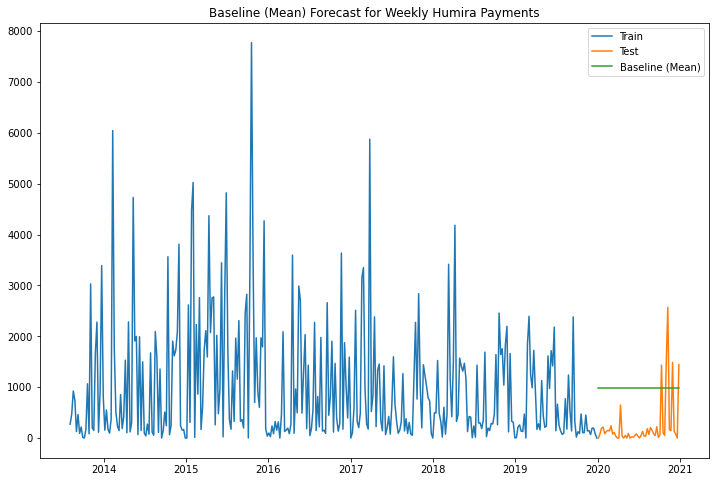

In [37]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['humi_dollars'], label='Train')
plt.plot(test.index, test['humi_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['simple_mean'], label="Baseline (Mean)")

plt.legend(loc='best')
plt.title("Baseline (Mean) Forecast for Weekly Humira Payments");

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
print("MAE for Simple Mean Baseline Model:", mean_absolute_error(df_preds['humi_dollars'], df_preds['simple_mean']))
print("RMSE for Simple Mean Baseline Model:", mean_squared_error(df_preds['humi_dollars'], df_preds['simple_mean'], squared=False))

MAE for Simple Mean Baseline Model: 870.5218226176805
RMSE for Simple Mean Baseline Model: 888.7715714040444


Make a Seasonal Baseline Model with shift of 7

In [40]:
df_preds['seasonal_7'] = train['humi_dollars'].shift(7, freq='W-SUN') 
df_preds.head(2)

,humira,humi_dollars,z_score,simple_mean,seasonal_7
Date_of_Payment,,,,,
2020-01-05,0,1.00,0.000000,984.888209,140.22
2020-01-12,5,89.04,-1.101683,984.888209,149.08


In [41]:
df_preds['seasonal_7'].fillna(0, inplace=True)

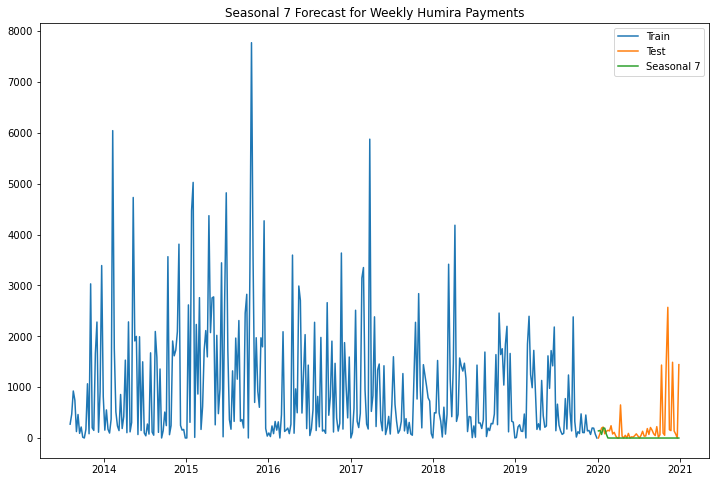

In [42]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['humi_dollars'], label='Train')
plt.plot(test.index, test['humi_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['seasonal_7'], label='Seasonal 7')

plt.legend(loc='best')
plt.title("Seasonal 7 Forecast for Weekly Humira Payments");

In [43]:
print("MAE for Seasonal Baseline 7 Shift Model:", mean_absolute_error(df_preds['humi_dollars'], df_preds['seasonal_7']))
print("RMSE for Seasonal Baseline 7 Shift Model:", mean_squared_error(df_preds['humi_dollars'], df_preds['seasonal_7'], squared=False))

MAE for Seasonal Baseline 7 Shift Model: 245.05519230769232
RMSE for Seasonal Baseline 7 Shift Model: 556.1668211015746


Seasonal Baseline Model with shift of 52

In [44]:
df_preds['seasonal_52'] = train['humi_dollars'].shift(52, freq='W-SUN') 
df_preds.head(2)

,humira,humi_dollars,z_score,simple_mean,seasonal_7,seasonal_52
Date_of_Payment,,,,,,
2020-01-05,0,1.00,0.000000,984.888209,140.22,11.81
2020-01-12,5,89.04,-1.101683,984.888209,149.08,218.29


In [45]:
df_preds['seasonal_52'].fillna(0, inplace=True)

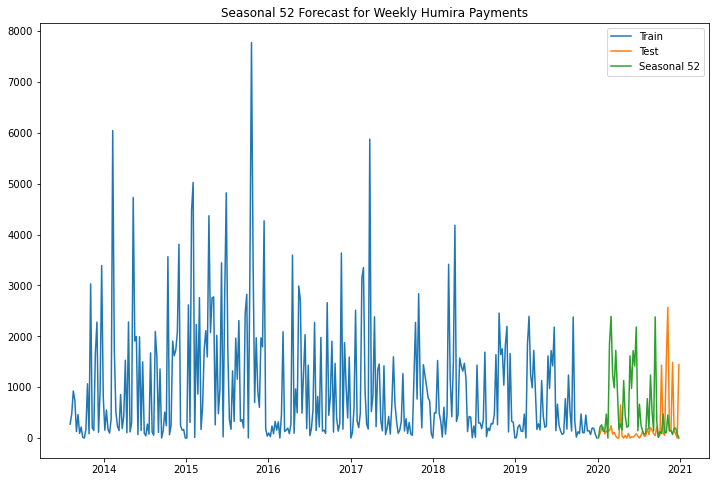

In [46]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['humi_dollars'], label='Train')
plt.plot(test.index, test['humi_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['seasonal_52'], label='Seasonal 52')

plt.legend(loc='best')
plt.title("Seasonal 52 Forecast for Weekly Humira Payments");

In [47]:
print("MAE for Seasonal Baseline 52 Shift Model:", mean_absolute_error(df_preds['humi_dollars'], df_preds['seasonal_52']))
print("RMSE for Seasonal Baseline 52 Shift Model:", mean_squared_error(df_preds['humi_dollars'], df_preds['seasonal_52'], squared=False))

MAE for Seasonal Baseline 52 Shift Model: 649.0503846153847
RMSE for Seasonal Baseline 52 Shift Model: 960.012183991192


Simple Exponential Smoothing Model

In [48]:
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing

In [49]:
ses = SimpleExpSmoothing(train['humi_dollars']).fit(smoothing_level=.5)

In [50]:
ses.summary()

Dep. Variable:,humi_dollars,No. Observations:,335
Model:,SimpleExpSmoothing,SSE,548558986.296
Optimized:,True,AIC,4797.406
Trend:,None,BIC,4805.034
Seasonal:,None,AICC,4797.527
Seasonal Periods:,None,Date:,"Sun, 13 Mar 2022"
Box-Cox:,False,Time:,23:07:14
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5000000,alpha,False
initial_level,428.87494,l.0,True


In [51]:
ses_forecast = ses.forecast(len(test))

In [52]:
df_preds['ses'] = ses_forecast

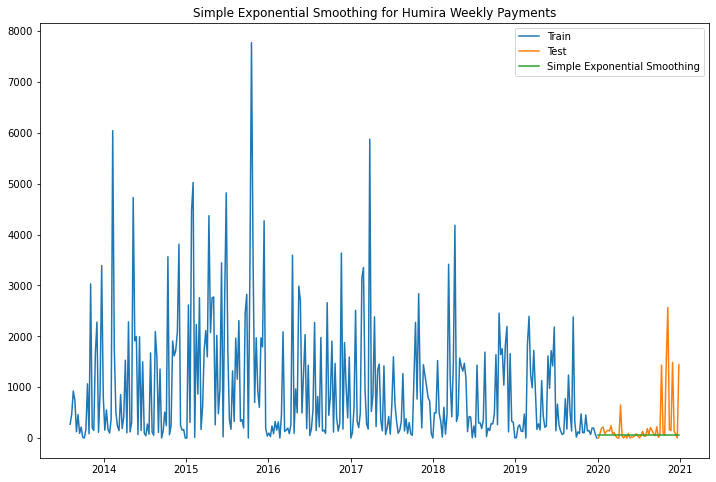

In [53]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['humi_dollars'], label='Train')
plt.plot(test.index, test['humi_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['ses'], label='Simple Exponential Smoothing')

plt.legend(loc='best')
plt.title("Simple Exponential Smoothing for Humira Weekly Payments");

In [54]:
print("MAE for Simple Exponential Smoothing Model:", mean_absolute_error(df_preds['humi_dollars'], df_preds['ses']))
print("RMSE for Simple Exponential Smoothing Model:", mean_squared_error(df_preds['humi_dollars'], df_preds['ses'], squared=False))

MAE for Simple Exponential Smoothing Model: 216.93705649518785
RMSE for Simple Exponential Smoothing Model: 531.633471420915


Holt-Winters Multiplicative Model with Seasonality of 52

In [55]:
hw_m52 = ExponentialSmoothing(
    train['humi_dollars'],
    seasonal_periods=52, 
    trend='mul',
    seasonal='mul'
).fit()

C:\Users\sarah\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [56]:
hw_m52.summary()

Dep. Variable:,humi_dollars,No. Observations:,335
Model:,ExponentialSmoothing,SSE,438479020.163
Optimized:,True,AIC,4830.372
Trend:,Multiplicative,BIC,5043.963
Seasonal:,Multiplicative,AICC,4855.169
Seasonal Periods:,52,Date:,"Sun, 13 Mar 2022"
Box-Cox:,False,Time:,23:07:15
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0403571,alpha,True
smoothing_trend,0.0161429,beta,True


In [57]:
df_preds['hw_m52'] = hw_m52.forecast(len(test))
df_preds.head(2)

,humira,humi_dollars,z_score,simple_mean,seasonal_7,seasonal_52,ses,hw_m52
Date_of_Payment,,,,,,,,
2020-01-05,0,1.00,0.000000,984.888209,140.22,11.81,64.295383,479.736894
2020-01-12,5,89.04,-1.101683,984.888209,149.08,218.29,64.295383,302.874580


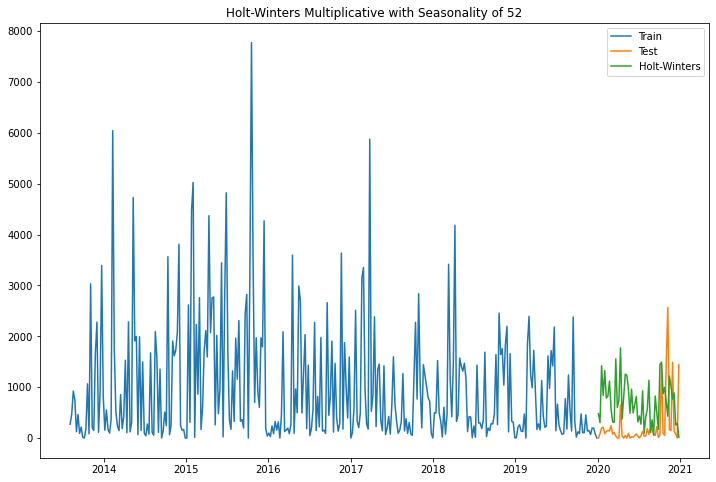

In [58]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['humi_dollars'], label='Train')
plt.plot(test.index, test['humi_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['hw_m52'], label='Holt-Winters')

plt.legend(loc='best')
plt.title("Holt-Winters Multiplicative with Seasonality of 52");

In [59]:
print("MAE for Holt-Winters Multiplicative with Seasonality of 52 Model:", mean_absolute_error(df_preds['humi_dollars'], df_preds['hw_m52']))
print("RMSE for Holt-Winters Multiplicative with Seasonality of 52 Model:", mean_squared_error(df_preds['humi_dollars'], df_preds['hw_m52'], squared=False))

MAE for Holt-Winters Multiplicative with Seasonality of 52 Model: 674.4597839176311
RMSE for Holt-Winters Multiplicative with Seasonality of 52 Model: 806.7171772130265


Now, try an additive Holt-Winters Model with a seasonal period of 52.

In [60]:
hw_a52 = ExponentialSmoothing(
    train['humi_dollars'],
    seasonal_periods=52, 
    trend='add',
    seasonal='add'
).fit()

C:\Users\sarah\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [61]:
hw_a52.summary()

Dep. Variable:,humi_dollars,No. Observations:,335
Model:,ExponentialSmoothing,SSE,406423144.458
Optimized:,True,AIC,4804.940
Trend:,Additive,BIC,5018.531
Seasonal:,Additive,AICC,4829.737
Seasonal Periods:,52,Date:,"Sun, 13 Mar 2022"
Box-Cox:,False,Time:,23:07:15
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0403571,alpha,True
smoothing_trend,0.0080714,beta,True


In [62]:
df_preds['hw_a52'] = hw_a52.forecast(len(test))
df_preds.head(2)

,humira,humi_dollars,z_score,simple_mean,seasonal_7,seasonal_52,ses,hw_m52,hw_a52
Date_of_Payment,,,,,,,,,
2020-01-05,0,1.00,0.000000,984.888209,140.22,11.81,64.295383,479.736894,173.159682
2020-01-12,5,89.04,-1.101683,984.888209,149.08,218.29,64.295383,302.874580,-239.322157


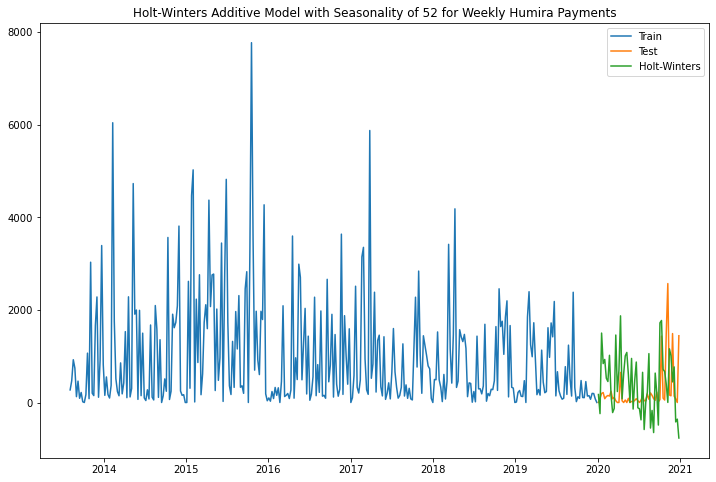

In [63]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['humi_dollars'], label='Train')
plt.plot(test.index, test['humi_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['hw_a52'], label='Holt-Winters')

plt.legend(loc='best')
plt.title("Holt-Winters Additive Model with Seasonality of 52 for Weekly Humira Payments");

In [64]:
print("MAE for Holt-Winters Additive with Seasonality of 52 Model:", mean_absolute_error(df_preds['humi_dollars'], df_preds['hw_a52']))
print("RMSE for Holt-Winters Additive with Seasonality of 52 Model:", mean_squared_error(df_preds['humi_dollars'], df_preds['hw_a52'], squared=False))

MAE for Holt-Winters Additive with Seasonality of 52 Model: 651.8128919884427
RMSE for Holt-Winters Additive with Seasonality of 52 Model: 833.7536826960124


Now, try an additive Holt-Winters Model with a seasonal period of 7.

In [65]:
hw_a7 = ExponentialSmoothing(
    train['humi_dollars'],
    seasonal_periods=7, 
    trend='add',
    seasonal='add'
).fit()

C:\Users\sarah\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [66]:
hw_a7.summary()

Dep. Variable:,humi_dollars,No. Observations:,335
Model:,ExponentialSmoothing,SSE,496896203.533
Optimized:,True,AIC,4782.270
Trend:,Additive,BIC,4824.225
Seasonal:,Additive,AICC,4783.404
Seasonal Periods:,7,Date:,"Sun, 13 Mar 2022"
Box-Cox:,False,Time:,23:07:16
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0403571,alpha,True
smoothing_trend,0.0322857,beta,True


In [67]:
df_preds['hw_a7'] = hw_a7.forecast(len(test))
df_preds.head(2)

,humira,humi_dollars,z_score,simple_mean,seasonal_7,seasonal_52,ses,hw_m52,hw_a52,hw_a7
Date_of_Payment,,,,,,,,,,
2020-01-05,0,1.00,0.000000,984.888209,140.22,11.81,64.295383,479.736894,173.159682,545.828347
2020-01-12,5,89.04,-1.101683,984.888209,149.08,218.29,64.295383,302.874580,-239.322157,74.648915


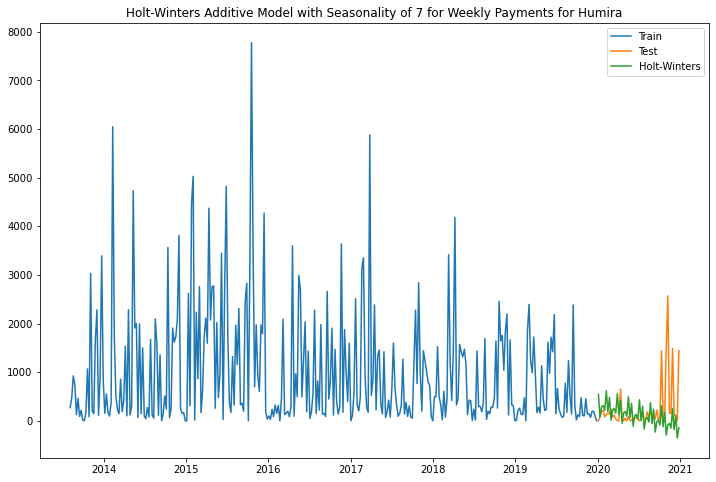

In [68]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['humi_dollars'], label='Train')
plt.plot(test.index, test['humi_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['hw_a7'], label='Holt-Winters')

plt.legend(loc='best')
plt.title("Holt-Winters Additive Model with Seasonality of 7 for Weekly Payments for Humira");

In [69]:
print("MAE for Holt-Winters Additive with Seasonality of 7 Model:", mean_absolute_error(df_preds['humi_dollars'], df_preds['hw_a7']))
print("RMSE for Holt-Winters Additive with Seasonality of 7 Model:", mean_squared_error(df_preds['humi_dollars'], df_preds['hw_a7'], squared=False))

MAE for Holt-Winters Additive with Seasonality of 7 Model: 327.8215508770638
RMSE for Holt-Winters Additive with Seasonality of 7 Model: 588.4263837006205


Now, try a multiplicative Holt-Winters Model with a seasonal period of 7.

In [70]:
hw_m7 = ExponentialSmoothing(
    train['humi_dollars'],
    seasonal_periods=7, 
    trend='mul',
    seasonal='mul'
).fit()

C:\Users\sarah\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [71]:
hw_m7.summary()

Dep. Variable:,humi_dollars,No. Observations:,335
Model:,ExponentialSmoothing,SSE,898402833.532
Optimized:,True,AIC,4980.670
Trend:,Multiplicative,BIC,5022.625
Seasonal:,Multiplicative,AICC,4981.803
Seasonal Periods:,7,Date:,"Sun, 13 Mar 2022"
Box-Cox:,False,Time:,23:07:17
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1110714,alpha,True
smoothing_trend,0.0617063,beta,True


In [72]:
df_preds['hw_m7'] = hw_m7.forecast(len(test))
df_preds.head(2)

,humira,humi_dollars,z_score,simple_mean,seasonal_7,seasonal_52,ses,hw_m52,hw_a52,hw_a7,hw_m7
Date_of_Payment,,,,,,,,,,,
2020-01-05,0,1.00,0.000000,984.888209,140.22,11.81,64.295383,479.736894,173.159682,545.828347,195.642090
2020-01-12,5,89.04,-1.101683,984.888209,149.08,218.29,64.295383,302.874580,-239.322157,74.648915,90.762877


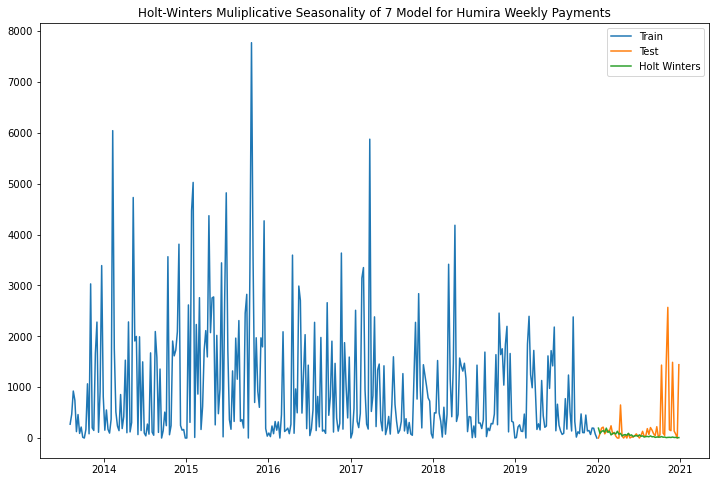

In [73]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['humi_dollars'], label='Train')
plt.plot(test.index, test['humi_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['hw_m7'], label='Holt Winters')

plt.legend(loc='best')
plt.title("Holt-Winters Muliplicative Seasonality of 7 Model for Humira Weekly Payments");

In [74]:
print("MAE for Holt-Winters Multiplicative with Seasonality of 7 Model:", mean_absolute_error(df_preds['humi_dollars'], df_preds['hw_m7']))
print("RMSE for Holt-Winters Multiplicative with Seasonality of 7 Model:", mean_squared_error(df_preds['humi_dollars'], df_preds['hw_m7'], squared=False))

MAE for Holt-Winters Multiplicative with Seasonality of 7 Model: 225.74942251524791
RMSE for Holt-Winters Multiplicative with Seasonality of 7 Model: 546.7738157596925


Try a SARIMA Model

In [75]:
from pmdarima.utils import tsdisplay

In [76]:
traina = train['humi_dollars']

C:\Users\sarah\anaconda3\lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


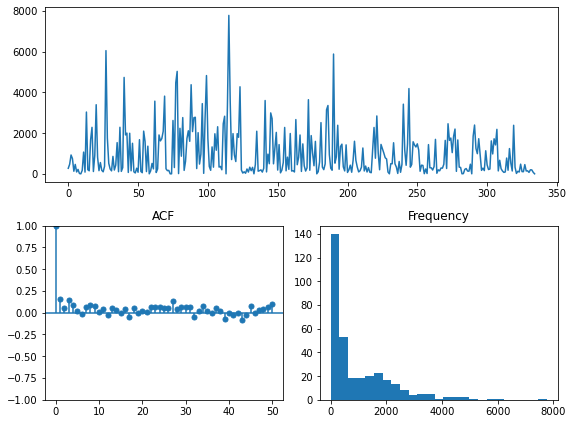

In [77]:
tsdisplay(traina)

In [78]:
import pmdarima as pmd
model_s7 = pmd.auto_arima(train['humi_dollars'], m=7, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=5852.659, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=5784.491, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=5675.087, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=5850.660, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=5673.096, Time=0.09 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=5675.087, Time=0.20 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=5671.877, Time=0.19 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=5673.740, Time=0.41 sec
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=5782.646, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[7] intercept   : AIC=5673.831, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=5672.953, T

In [79]:
model_s7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  335
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -2831.964
Date:                Sun, 13 Mar 2022   AIC                           5669.927
Time:                        23:07:26   BIC                           5681.360
Sample:                             0   HQIC                          5674.486
                                - 335                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8550      0.048    -17.871      0.000      -0.949      -0.761
ma.L2         -0.1032      0.051     -2.031      0.042      -0.203      -0.004
sigma2      1.347e+06   6.08e+04     22.144      0.000    1.23e+06    1.47e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               426.76
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.33   Skew:                             1.75
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [80]:
preds_sar7 = model_s7.predict(test.shape[0])
preds_sar7

array([461.13033183, 511.22997631, 511.22997631, 511.22997631,
       511.22997631, 511.22997631, 511.22997631, 511.22997631,
       511.22997631, 511.22997631, 511.22997631, 511.22997631,
       511.22997631, 511.22997631, 511.22997631, 511.22997631,
       511.22997631, 511.22997631, 511.22997631, 511.22997631,
       511.22997631, 511.22997631, 511.22997631, 511.22997631,
       511.22997631, 511.22997631, 511.22997631, 511.22997631,
       511.22997631, 511.22997631, 511.22997631, 511.22997631,
       511.22997631, 511.22997631, 511.22997631, 511.22997631,
       511.22997631, 511.22997631, 511.22997631, 511.22997631,
       511.22997631, 511.22997631, 511.22997631, 511.22997631,
       511.22997631, 511.22997631, 511.22997631, 511.22997631,
       511.22997631, 511.22997631, 511.22997631, 511.22997631])

In [81]:
df_preds['sarima7_auto'] = preds_sar7
df_preds['sarima7_auto'].head(2)

Date_of_Payment
2020-01-05    461.130332
2020-01-12    511.229976
Freq: W-SUN, Name: sarima7_auto, dtype: float64

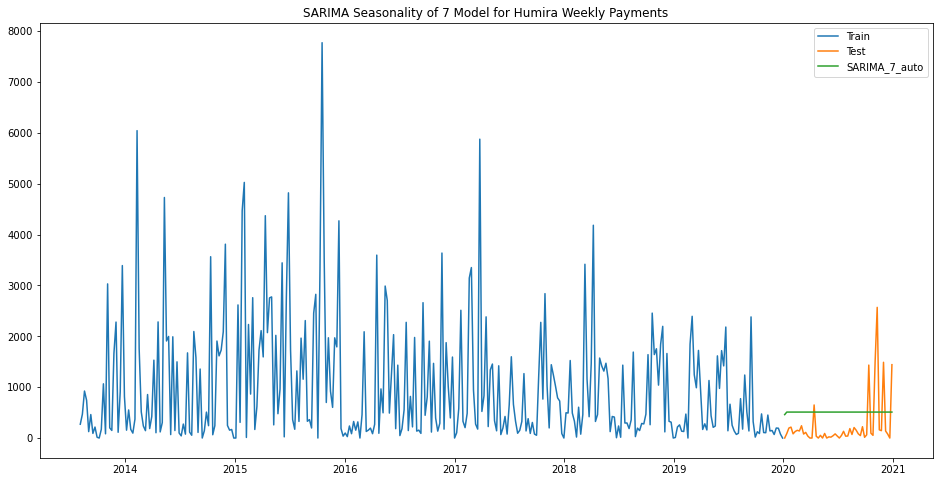

In [82]:
plt.figure(figsize=(16,8))
plt.plot(train['humi_dollars'], label='Train')
plt.plot(test['humi_dollars'], label='Test')
plt.plot(df_preds['sarima7_auto'], label='SARIMA_7_auto')
plt.legend(loc='best')
plt.title("SARIMA Seasonality of 7 Model for Humira Weekly Payments");

In [83]:
print("MAE for SARIMA with Seasonality of 7 Model:", mean_absolute_error(df_preds['humi_dollars'], df_preds['sarima7_auto']))
print("RMSE for SARIMA with Seasonality of 7 Model:", mean_squared_error(df_preds['humi_dollars'], df_preds['sarima7_auto'], squared=False))

MAE for SARIMA with Seasonality of 7 Model: 492.36402707686534
RMSE for SARIMA with Seasonality of 7 Model: 562.3900083401959


Try a SARIMA Model with m = 52

In [84]:
model_s52 = pmd.auto_arima(train['humi_dollars'], m=52, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[52] intercept   : AIC=inf, Time=9.43 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=5852.659, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=5781.679, Time=0.63 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=5674.257, Time=3.21 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=5850.660, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=5673.096, Time=0.09 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=5674.141, Time=2.69 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=inf, Time=5.12 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=5671.877, Time=0.21 sec
 ARIMA(1,1,1)(1,0,0)[52] intercept   : AIC=5672.742, Time=4.52 sec
 ARIMA(1,1,1)(0,0,1)[52] intercept   : AIC=5673.878, Time=5.55 sec
 ARIMA(1,1,1)(1,0,1)[52] intercept   : AIC=inf, Time=6.97 sec
 ARIMA(1,1,0)(0,0,0)[52] intercept   : AIC=5782.646, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[52] intercept   : AIC=5673.831, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept

In [85]:
model_s52.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  335
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -2831.964
Date:                Sun, 13 Mar 2022   AIC                           5669.927
Time:                        23:08:36   BIC                           5681.360
Sample:                             0   HQIC                          5674.486
                                - 335                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8550      0.048    -17.871      0.000      -0.949      -0.761
ma.L2         -0.1032      0.051     -2.031      0.042      -0.203      -0.004
sigma2      1.347e+06   6.08e+04     22.144      0.000    1.23e+06    1.47e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               426.76
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.33   Skew:                             1.75
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [86]:
preds_sar52 = model_s52.predict(test.shape[0])
preds_sar52

array([461.13033183, 511.22997631, 511.22997631, 511.22997631,
       511.22997631, 511.22997631, 511.22997631, 511.22997631,
       511.22997631, 511.22997631, 511.22997631, 511.22997631,
       511.22997631, 511.22997631, 511.22997631, 511.22997631,
       511.22997631, 511.22997631, 511.22997631, 511.22997631,
       511.22997631, 511.22997631, 511.22997631, 511.22997631,
       511.22997631, 511.22997631, 511.22997631, 511.22997631,
       511.22997631, 511.22997631, 511.22997631, 511.22997631,
       511.22997631, 511.22997631, 511.22997631, 511.22997631,
       511.22997631, 511.22997631, 511.22997631, 511.22997631,
       511.22997631, 511.22997631, 511.22997631, 511.22997631,
       511.22997631, 511.22997631, 511.22997631, 511.22997631,
       511.22997631, 511.22997631, 511.22997631, 511.22997631])

In [87]:
df_preds['sarima52_auto'] = preds_sar52
df_preds['sarima52_auto'].head(2)

Date_of_Payment
2020-01-05    461.130332
2020-01-12    511.229976
Freq: W-SUN, Name: sarima52_auto, dtype: float64

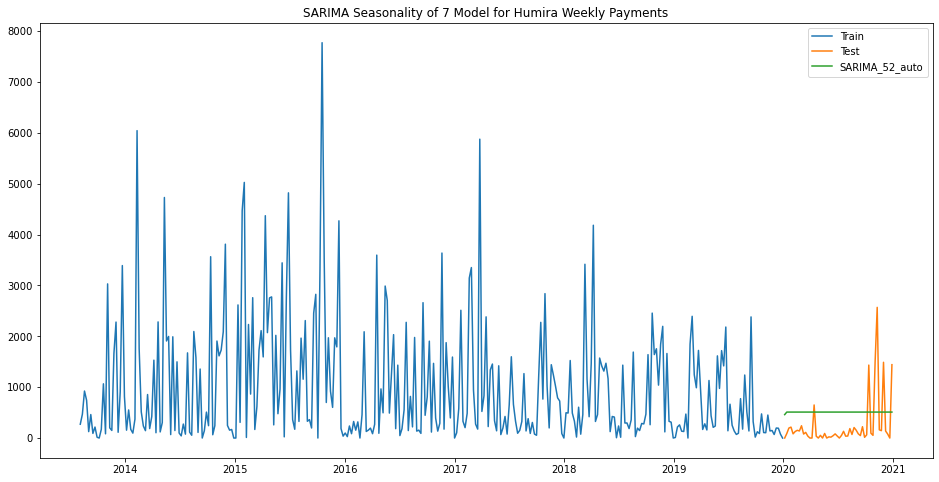

In [88]:
plt.figure(figsize=(16,8))
plt.plot(train['humi_dollars'], label='Train')
plt.plot(test['humi_dollars'], label='Test')
plt.plot(df_preds['sarima52_auto'], label='SARIMA_52_auto')
plt.legend(loc='best')
plt.title("SARIMA Seasonality of 7 Model for Humira Weekly Payments");

In [89]:
print("MAE for Holt-Winters Additive with Seasonality of 52 Model:", mean_absolute_error(df_preds['humi_dollars'], df_preds['sarima52_auto']))
print("RMSE for Holt-Winters Additive with Seasonality of 52 Model:", mean_squared_error(df_preds['humi_dollars'], df_preds['sarima52_auto'], squared=False))

MAE for Holt-Winters Additive with Seasonality of 52 Model: 492.36402707686534
RMSE for Holt-Winters Additive with Seasonality of 52 Model: 562.3900083401959


In [90]:
print("Summary of Metrics for Weekly Humira CMS Payments")
print("_________________________________________________")
print("MAE for Simple Mean Baseline Model:", mean_absolute_error(df_preds['humi_dollars'], df_preds['simple_mean']))
print("RMSE for Simple Mean Baseline Model:", mean_squared_error(df_preds['humi_dollars'], df_preds['simple_mean'], squared=False))
print("_________________________________________________")
print("MAE for Seasonal Baseline 7 Shift Model:", mean_absolute_error(df_preds['humi_dollars'], df_preds['seasonal_7']))
print("RMSE for Seasonal Baseline 7 Shift Model:", mean_squared_error(df_preds['humi_dollars'], df_preds['seasonal_7'], squared=False))
print("_________________________________________________")
print("MAE for Seasonal Baseline 52 Shift Model:", mean_absolute_error(df_preds['humi_dollars'], df_preds['seasonal_52']))
print("RMSE for Seasonal Baseline 52 Shift Model:", mean_squared_error(df_preds['humi_dollars'], df_preds['seasonal_52'], squared=False))
print("_________________________________________________")
print("MAE for Simple Exponential Smoothing Model:", mean_absolute_error(df_preds['humi_dollars'], df_preds['ses']))
print("RMSE for Simple Exponential Smoothing Model:", mean_squared_error(df_preds['humi_dollars'], df_preds['ses'], squared=False))
print("_________________________________________________")
print("MAE for Holt-Winters Multiplicative with Seasonality of 7 Model:", mean_absolute_error(df_preds['humi_dollars'], df_preds['hw_m7']))
print("RMSE for Holt-Winters Multiplicative with Seasonality of 7 Model:", mean_squared_error(df_preds['humi_dollars'], df_preds['hw_m7'], squared=False))
print("_________________________________________________")
print("MAE for Holt-Winters Multiplicative with Seasonality of 52 Model:", mean_absolute_error(df_preds['humi_dollars'], df_preds['hw_m52']))
print("RMSE for Holt-Winters Multiplicative with Seasonality of 52 Model:", mean_squared_error(df_preds['humi_dollars'], df_preds['hw_m52'], squared=False))
print("_________________________________________________")


Summary of Metrics for Weekly Humira CMS Payments
_________________________________________________
MAE for Simple Mean Baseline Model: 870.5218226176805
RMSE for Simple Mean Baseline Model: 888.7715714040444
_________________________________________________
MAE for Seasonal Baseline 7 Shift Model: 245.05519230769232
RMSE for Seasonal Baseline 7 Shift Model: 556.1668211015746
_________________________________________________
MAE for Seasonal Baseline 52 Shift Model: 649.0503846153847
RMSE for Seasonal Baseline 52 Shift Model: 960.012183991192
_________________________________________________
MAE for Simple Exponential Smoothing Model: 216.93705649518785
RMSE for Simple Exponential Smoothing Model: 531.633471420915
_________________________________________________
MAE for Holt-Winters Multiplicative with Seasonality of 7 Model: 225.74942251524791
RMSE for Holt-Winters Multiplicative with Seasonality of 7 Model: 546.7738157596925
_________________________________________________
MAE for 

In [91]:
print("Continued Summary of Metrics for Weeky Humira CMS Payments")
print("_________________________________________________")
print("MAE for Holt-Winters Additive with Seasonality of 7 Model:", mean_absolute_error(df_preds['humi_dollars'], df_preds['hw_a7']))
print("RMSE for Holt-Winters Additive with Seasonality of 7 Model:", mean_squared_error(df_preds['humi_dollars'], df_preds['hw_a7'], squared=False))
print("_________________________________________________")
print("MAE for Holt-Winters Additive with Seasonality of 52 Model:", mean_absolute_error(df_preds['humi_dollars'], df_preds['hw_a52']))
print("RMSE for Holt-Winters Additive with Seasonality of 52 Model:", mean_squared_error(df_preds['humi_dollars'], df_preds['hw_a52'], squared=False))
print("_________________________________________________")
print("MAE for SARIMA with Seasonality of 7 Model:", mean_absolute_error(df_preds['humi_dollars'], df_preds['sarima7_auto']))
print("RMSE for SARIMA with Seasonality of 7 Model:", mean_squared_error(df_preds['humi_dollars'], df_preds['sarima7_auto'], squared=False))
print("_________________________________________________")
print("MAE for SARIMA with Seasonality of 52 Model:", mean_absolute_error(df_preds['humi_dollars'], df_preds['sarima52_auto']))
print("RMSE for SARIMA with Seasonality of 52 Model:", mean_squared_error(df_preds['humi_dollars'], df_preds['sarima52_auto'], squared=False))
print("_________________________________________________")

Continued Summary of Metrics for Weeky Humira CMS Payments
_________________________________________________
MAE for Holt-Winters Additive with Seasonality of 7 Model: 327.8215508770638
RMSE for Holt-Winters Additive with Seasonality of 7 Model: 588.4263837006205
_________________________________________________
MAE for Holt-Winters Additive with Seasonality of 52 Model: 651.8128919884427
RMSE for Holt-Winters Additive with Seasonality of 52 Model: 833.7536826960124
_________________________________________________
MAE for SARIMA with Seasonality of 7 Model: 492.36402707686534
RMSE for SARIMA with Seasonality of 7 Model: 562.3900083401959
_________________________________________________
MAE for SARIMA with Seasonality of 52 Model: 492.36402707686534
RMSE for SARIMA with Seasonality of 52 Model: 562.3900083401959
_________________________________________________
